In [2]:
!pip install dagshub mlflow --quiet

import warnings
warnings.filterwarnings("ignore")

print("Done!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 7.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 60.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.5/95.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. Thi

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip


In [4]:
# Import additional libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style and suppress warnings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")


Libraries imported successfully!


In [5]:
# Load the datasets (NOT loading test.csv for EDA as per instructions)
# Adjust paths for Kaggle environment
train_df = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip')
stores_df = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv')
features_df = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip')

print("Dataset shapes:")
print(f"Train data: {train_df.shape}")
print(f"Stores data: {stores_df.shape}")
print(f"Features data: {features_df.shape}")

print("\n" + "="*50)
print("TRAIN DATA INFO")
print("="*50)
print(train_df.info())
print("\nFirst 5 rows:")
print(train_df.head())

print("\n" + "="*50)
print("STORES DATA INFO")
print("="*50)
print(stores_df.info())
print("\nFirst 5 rows:")
print(stores_df.head())

print("\n" + "="*50)
print("FEATURES DATA INFO")
print("="*50)
print(features_df.info())
print("\nFirst 5 rows:")
print(features_df.head())


Dataset shapes:
Train data: (421570, 5)
Stores data: (45, 3)
Features data: (8190, 12)

TRAIN DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None

First 5 rows:
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

STORES DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 ent

In [6]:
# Data preprocessing and cleaning
print("MISSING VALUES ANALYSIS")
print("="*50)

# Check missing values in each dataset
print("Train data missing values:")
print(train_df.isnull().sum())

print("\nStores data missing values:")
print(stores_df.isnull().sum())

print("\nFeatures data missing values:")
print(features_df.isnull().sum())

# Convert Date columns to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])
features_df['Date'] = pd.to_datetime(features_df['Date'])

print("\n" + "="*50)
print("DATE RANGE ANALYSIS")
print("="*50)
print(f"Train data date range: {train_df['Date'].min()} to {train_df['Date'].max()}")
print(f"Features data date range: {features_df['Date'].min()} to {features_df['Date'].max()}")

# Basic statistics
print("\n" + "="*50)
print("BASIC STATISTICS")
print("="*50)
print("Train data numeric columns:")
print(train_df.describe())

print("\nFeatures data numeric columns:")
print(features_df.describe())


MISSING VALUES ANALYSIS
Train data missing values:
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Stores data missing values:
Store    0
Type     0
Size     0
dtype: int64

Features data missing values:
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

DATE RANGE ANALYSIS
Train data date range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00
Features data date range: 2010-02-05 00:00:00 to 2013-07-26 00:00:00

BASIC STATISTICS
Train data numeric columns:
               Store           Dept                           Date  \
count  421570.000000  421570.000000                         421570   
mean       22.200546      44.260317  2011-06-18 08:30:31.963375104   
min         1.000000       1.000000            2010-02-05 00:00

In [7]:
# Store and Department Analysis
print("STORE AND DEPARTMENT ANALYSIS")
print("="*50)

print(f"Number of unique stores: {train_df['Store'].nunique()}")
print(f"Number of unique departments: {train_df['Dept'].nunique()}")
print(f"Total number of store-department combinations: {train_df[['Store', 'Dept']].drop_duplicates().shape[0]}")

print("\nStore types and sizes:")
print(stores_df['Type'].value_counts())
print("\nStore size statistics:")
print(stores_df['Size'].describe())

# Top departments by average sales
dept_sales = train_df.groupby('Dept')['Weekly_Sales'].agg(['mean', 'sum', 'count']).sort_values('mean', ascending=False)
print("\nTop 10 departments by average weekly sales:")
print(dept_sales.head(10))

# Top stores by average sales
store_sales = train_df.groupby('Store')['Weekly_Sales'].agg(['mean', 'sum', 'count']).sort_values('mean', ascending=False)
print("\nTop 10 stores by average weekly sales:")
print(store_sales.head(10))


STORE AND DEPARTMENT ANALYSIS
Number of unique stores: 45
Number of unique departments: 81
Total number of store-department combinations: 3331

Store types and sizes:
Type
A    22
B    17
C     6
Name: count, dtype: int64

Store size statistics:
count        45.000000
mean     130287.600000
std       63825.271991
min       34875.000000
25%       70713.000000
50%      126512.000000
75%      202307.000000
max      219622.000000
Name: Size, dtype: float64

Top 10 departments by average weekly sales:
              mean           sum  count
Dept                                   
92    75204.870531  4.839433e+08   6435
95    69824.423080  4.493202e+08   6435
38    61090.619568  3.931181e+08   6435
72    50566.515417  3.057252e+08   6046
65    45441.706224  6.498164e+06    143
90    45232.084488  2.910685e+08   6435
40    44900.702727  2.889360e+08   6435
2     43607.020113  2.806112e+08   6435
91    33687.910758  2.167817e+08   6435
94    33405.883963  1.899125e+08   5685

Top 10 stores by 

In [8]:
# Holiday Analysis
print("HOLIDAY ANALYSIS")
print("="*50)

# Holiday statistics
holiday_stats = train_df.groupby('IsHoliday')['Weekly_Sales'].agg(['count', 'mean', 'std', 'min', 'max'])
print("Holiday vs Non-Holiday Statistics:")
print(holiday_stats)

# Specific holiday analysis (based on known holiday dates from challenge description)
holiday_dates = [
    '2010-02-12', '2011-02-11', '2012-02-10',  # Super Bowl
    '2010-09-10', '2011-09-09', '2012-09-07',  # Labor Day
    '2010-11-26', '2011-11-25', '2012-11-23',  # Thanksgiving
    '2010-12-31', '2011-12-30', '2012-12-28'   # Christmas
]

holiday_dates = pd.to_datetime(holiday_dates)
specific_holidays = train_df[train_df['Date'].isin(holiday_dates)]

if not specific_holidays.empty:
    print(f"\nSpecific holiday weeks sales statistics:")
    print(specific_holidays.groupby('Date')['Weekly_Sales'].sum().sort_index())

# Holiday impact by department
holiday_impact = train_df.groupby(['Dept', 'IsHoliday'])['Weekly_Sales'].mean().unstack()
holiday_impact['Holiday_Ratio'] = holiday_impact[True] / holiday_impact[False]
holiday_impact = holiday_impact.sort_values('Holiday_Ratio', ascending=False)

print("\nTop 10 departments most positively affected by holidays:")
print(holiday_impact[['Holiday_Ratio']].head(10))

print("\nTop 10 departments most negatively affected by holidays:")
print(holiday_impact[['Holiday_Ratio']].tail(10))


HOLIDAY ANALYSIS
Holiday vs Non-Holiday Statistics:
            count          mean           std      min        max
IsHoliday                                                        
False      391909  15901.445069  22330.747450 -4988.94  406988.63
True        29661  17035.823187  27222.000409  -798.00  693099.36

Specific holiday weeks sales statistics:
Date
2010-02-12    48336677.63
2010-09-10    45634397.84
2010-11-26    65821003.24
2010-12-31    40432519.00
2011-02-11    47336192.79
2011-09-09    46763227.53
2011-11-25    66593605.26
2011-12-30    46042461.04
2012-02-10    50009407.92
2012-09-07    48330059.31
Name: Weekly_Sales, dtype: float64

Top 10 departments most positively affected by holidays:
IsHoliday  Holiday_Ratio
Dept                    
99              4.031230
77              3.233670
59              2.024619
72              2.008892
6               1.735207
18              1.723448
55              1.689100
5               1.576875
14              1.369079
71       

In [10]:
# Data Merging and Preparation for Advanced Analysis
print("DATA MERGING AND PREPARATION")
print("="*50)

# Check columns in each dataset
print("Train data columns:", train_df.columns.tolist())
print("Stores data columns:", stores_df.columns.tolist())  
print("Features data columns:", features_df.columns.tolist())

# Merge all datasets - handle IsHoliday column conflict
# First merge with stores
merged_data = train_df.merge(stores_df, on='Store', how='left')

# For features merge, we need to handle the IsHoliday column conflict
# Both datasets have IsHoliday, so let's use suffixes to distinguish them
merged_data = merged_data.merge(features_df, on=['Store', 'Date'], how='left', suffixes=('', '_features'))

# Check if we have duplicate IsHoliday columns and handle them
if 'IsHoliday_features' in merged_data.columns:
    # Keep the original IsHoliday from train data and drop the features one
    merged_data = merged_data.drop('IsHoliday_features', axis=1)
    print("Handled IsHoliday column conflict - kept original from train data")

print(f"\nMerged data shape: {merged_data.shape}")
print(f"Merged data columns: {merged_data.columns.tolist()}")
print(f"Missing values after merging:")
print(merged_data.isnull().sum())

# Create time-based features for analysis
merged_data['Year'] = merged_data['Date'].dt.year
merged_data['Month'] = merged_data['Date'].dt.month
merged_data['Week'] = merged_data['Date'].dt.isocalendar().week
merged_data['DayOfYear'] = merged_data['Date'].dt.dayofyear
merged_data['Quarter'] = merged_data['Date'].dt.quarter

# Aggregate sales by date for time series analysis
# Check which columns exist before aggregating
available_columns = merged_data.columns.tolist()
agg_dict = {'Weekly_Sales': 'sum'}

# Add columns to aggregation only if they exist
if 'IsHoliday' in available_columns:
    agg_dict['IsHoliday'] = 'first'
if 'Temperature' in available_columns:
    agg_dict['Temperature'] = 'mean'
if 'Fuel_Price' in available_columns:
    agg_dict['Fuel_Price'] = 'mean'
if 'CPI' in available_columns:
    agg_dict['CPI'] = 'mean'
if 'Unemployment' in available_columns:
    agg_dict['Unemployment'] = 'mean'

print(f"\nAggregation dictionary: {agg_dict}")

daily_sales = merged_data.groupby('Date').agg(agg_dict).reset_index()

print(f"\nDaily aggregated data shape: {daily_sales.shape}")
print(f"Daily aggregated data columns: {daily_sales.columns.tolist()}")
print(f"Date range: {daily_sales['Date'].min()} to {daily_sales['Date'].max()}")

# Sort by date for time series analysis
daily_sales = daily_sales.sort_values('Date').reset_index(drop=True)

print("Data merging and preparation completed!")


DATA MERGING AND PREPARATION
Train data columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']
Stores data columns: ['Store', 'Type', 'Size']
Features data columns: ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']
Handled IsHoliday column conflict - kept original from train data

Merged data shape: (421570, 16)
Merged data columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
Missing values after merging:
Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI               

In [11]:
# Import additional libraries for time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import scipy.stats as stats

print("Time series analysis libraries imported!")


Time series analysis libraries imported!


TREND ANALYSIS


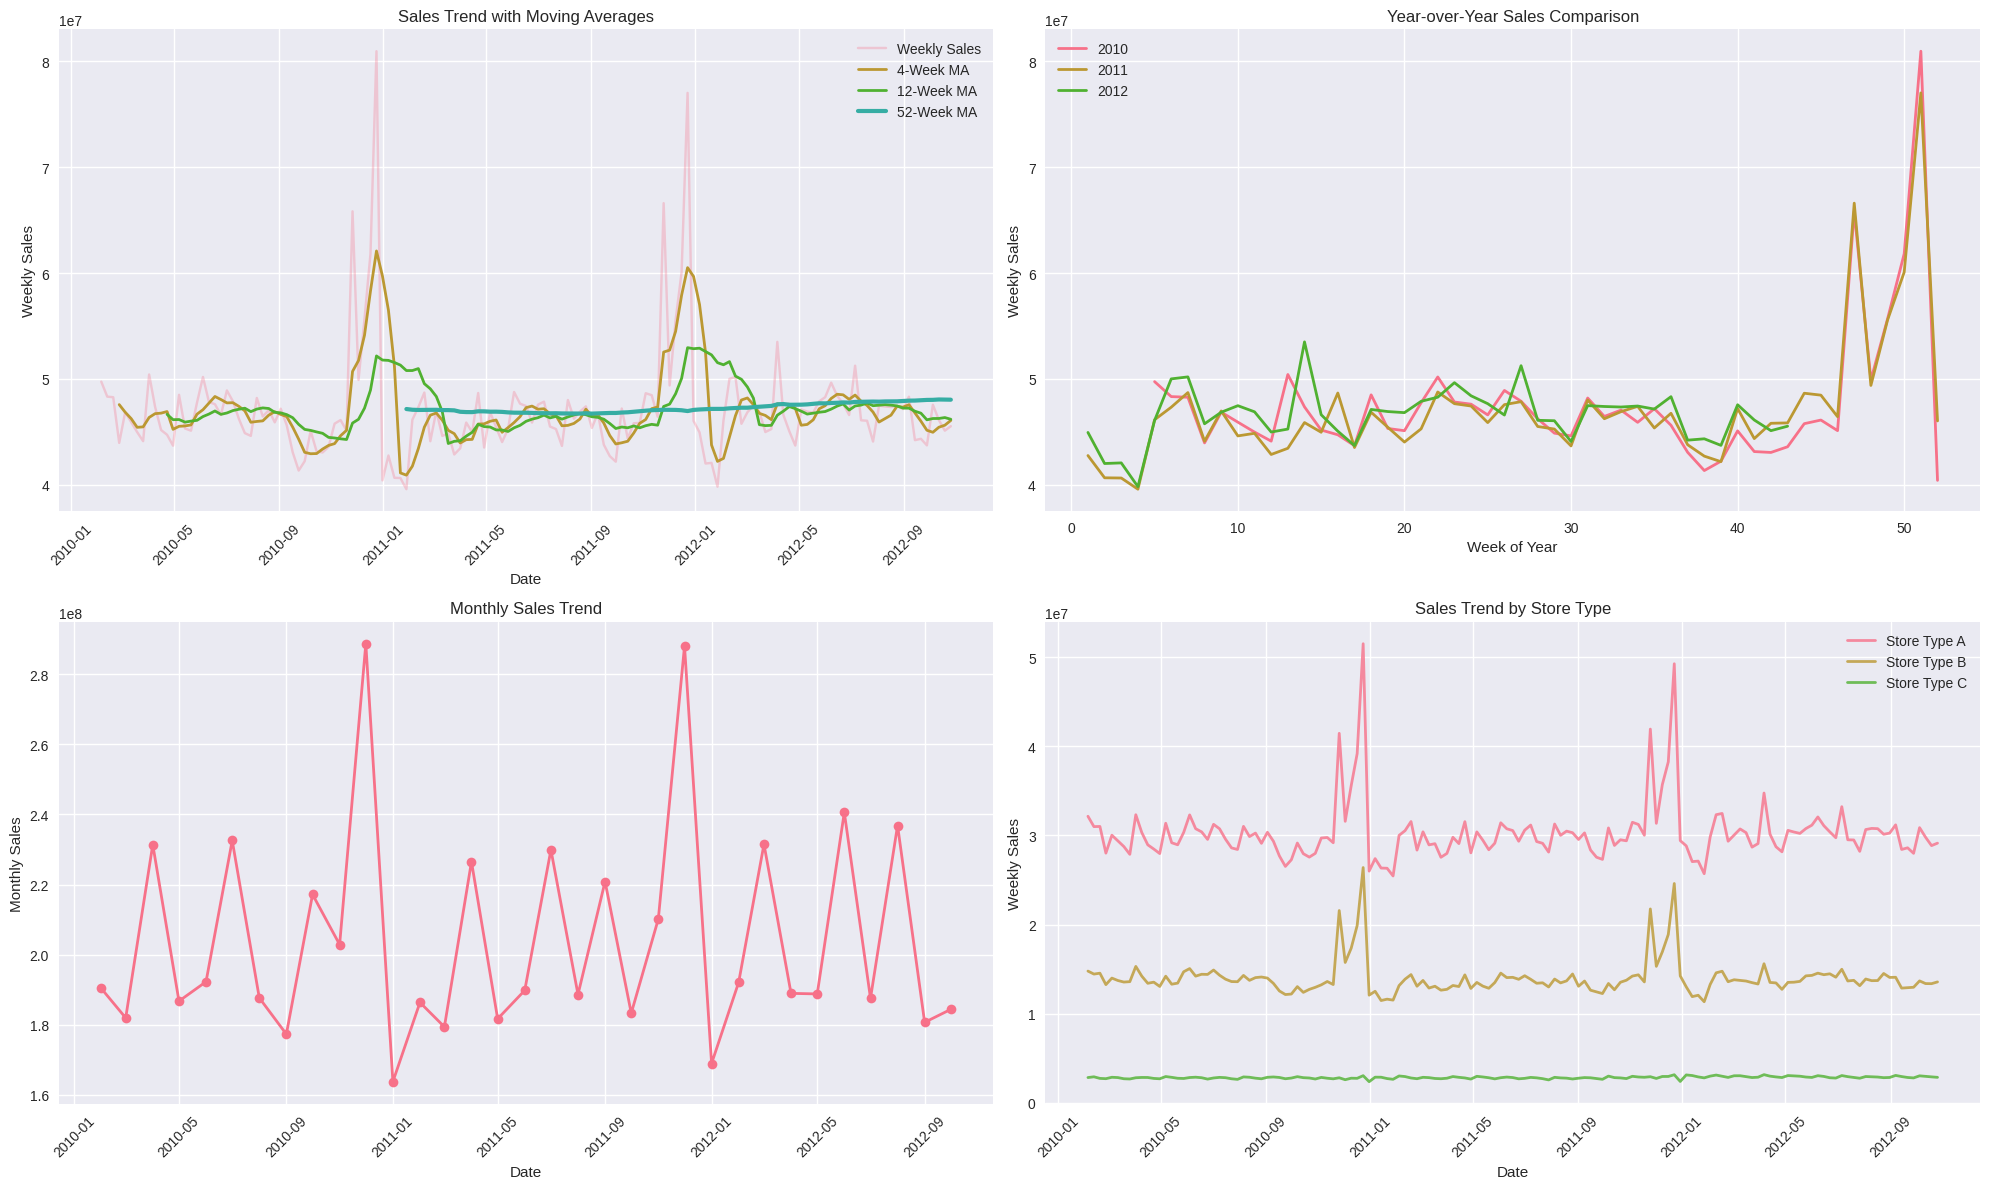

Overall trend correlation with time: 0.0325
52-week moving average final vs initial ratio: 1.0187


In [12]:
# TREND ANALYSIS
print("TREND ANALYSIS")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# 1. Overall Sales Trend with Moving Averages
axes[0,0].plot(daily_sales['Date'], daily_sales['Weekly_Sales'], alpha=0.3, label='Weekly Sales')

# Calculate moving averages
daily_sales['MA_4week'] = daily_sales['Weekly_Sales'].rolling(window=4).mean()
daily_sales['MA_12week'] = daily_sales['Weekly_Sales'].rolling(window=12).mean()
daily_sales['MA_52week'] = daily_sales['Weekly_Sales'].rolling(window=52).mean()

axes[0,0].plot(daily_sales['Date'], daily_sales['MA_4week'], label='4-Week MA', linewidth=2)
axes[0,0].plot(daily_sales['Date'], daily_sales['MA_12week'], label='12-Week MA', linewidth=2)
axes[0,0].plot(daily_sales['Date'], daily_sales['MA_52week'], label='52-Week MA', linewidth=3)

axes[0,0].set_title('Sales Trend with Moving Averages')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Weekly Sales')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Year-over-Year Growth Rate
yearly_sales = merged_data.groupby(['Year', 'Week'])['Weekly_Sales'].sum().reset_index()
yearly_pivot = yearly_sales.pivot(index='Week', columns='Year', values='Weekly_Sales')

for year in yearly_pivot.columns:
    axes[0,1].plot(yearly_pivot.index, yearly_pivot[year], label=f'{year}', linewidth=2)

axes[0,1].set_title('Year-over-Year Sales Comparison')
axes[0,1].set_xlabel('Week of Year')
axes[0,1].set_ylabel('Weekly Sales')
axes[0,1].legend()

# 3. Monthly Trend Analysis
monthly_trend = merged_data.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()
monthly_trend['YearMonth'] = pd.to_datetime(monthly_trend[['Year', 'Month']].assign(day=1))

axes[1,0].plot(monthly_trend['YearMonth'], monthly_trend['Weekly_Sales'], marker='o', linewidth=2)
axes[1,0].set_title('Monthly Sales Trend')
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Monthly Sales')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Store Type Performance Trends
store_type_trend = merged_data.groupby(['Date', 'Type'])['Weekly_Sales'].sum().reset_index()

for store_type in store_type_trend['Type'].unique():
    type_data = store_type_trend[store_type_trend['Type'] == store_type]
    axes[1,1].plot(type_data['Date'], type_data['Weekly_Sales'], 
                   label=f'Store Type {store_type}', linewidth=2, alpha=0.8)

axes[1,1].set_title('Sales Trend by Store Type')
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Weekly Sales')
axes[1,1].legend()
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Trend statistics
print(f"Overall trend correlation with time: {stats.pearsonr(range(len(daily_sales)), daily_sales['Weekly_Sales'])[0]:.4f}")
print(f"52-week moving average final vs initial ratio: {daily_sales['MA_52week'].iloc[-1] / daily_sales['MA_52week'].iloc[51]:.4f}")


SEASONALITY ANALYSIS


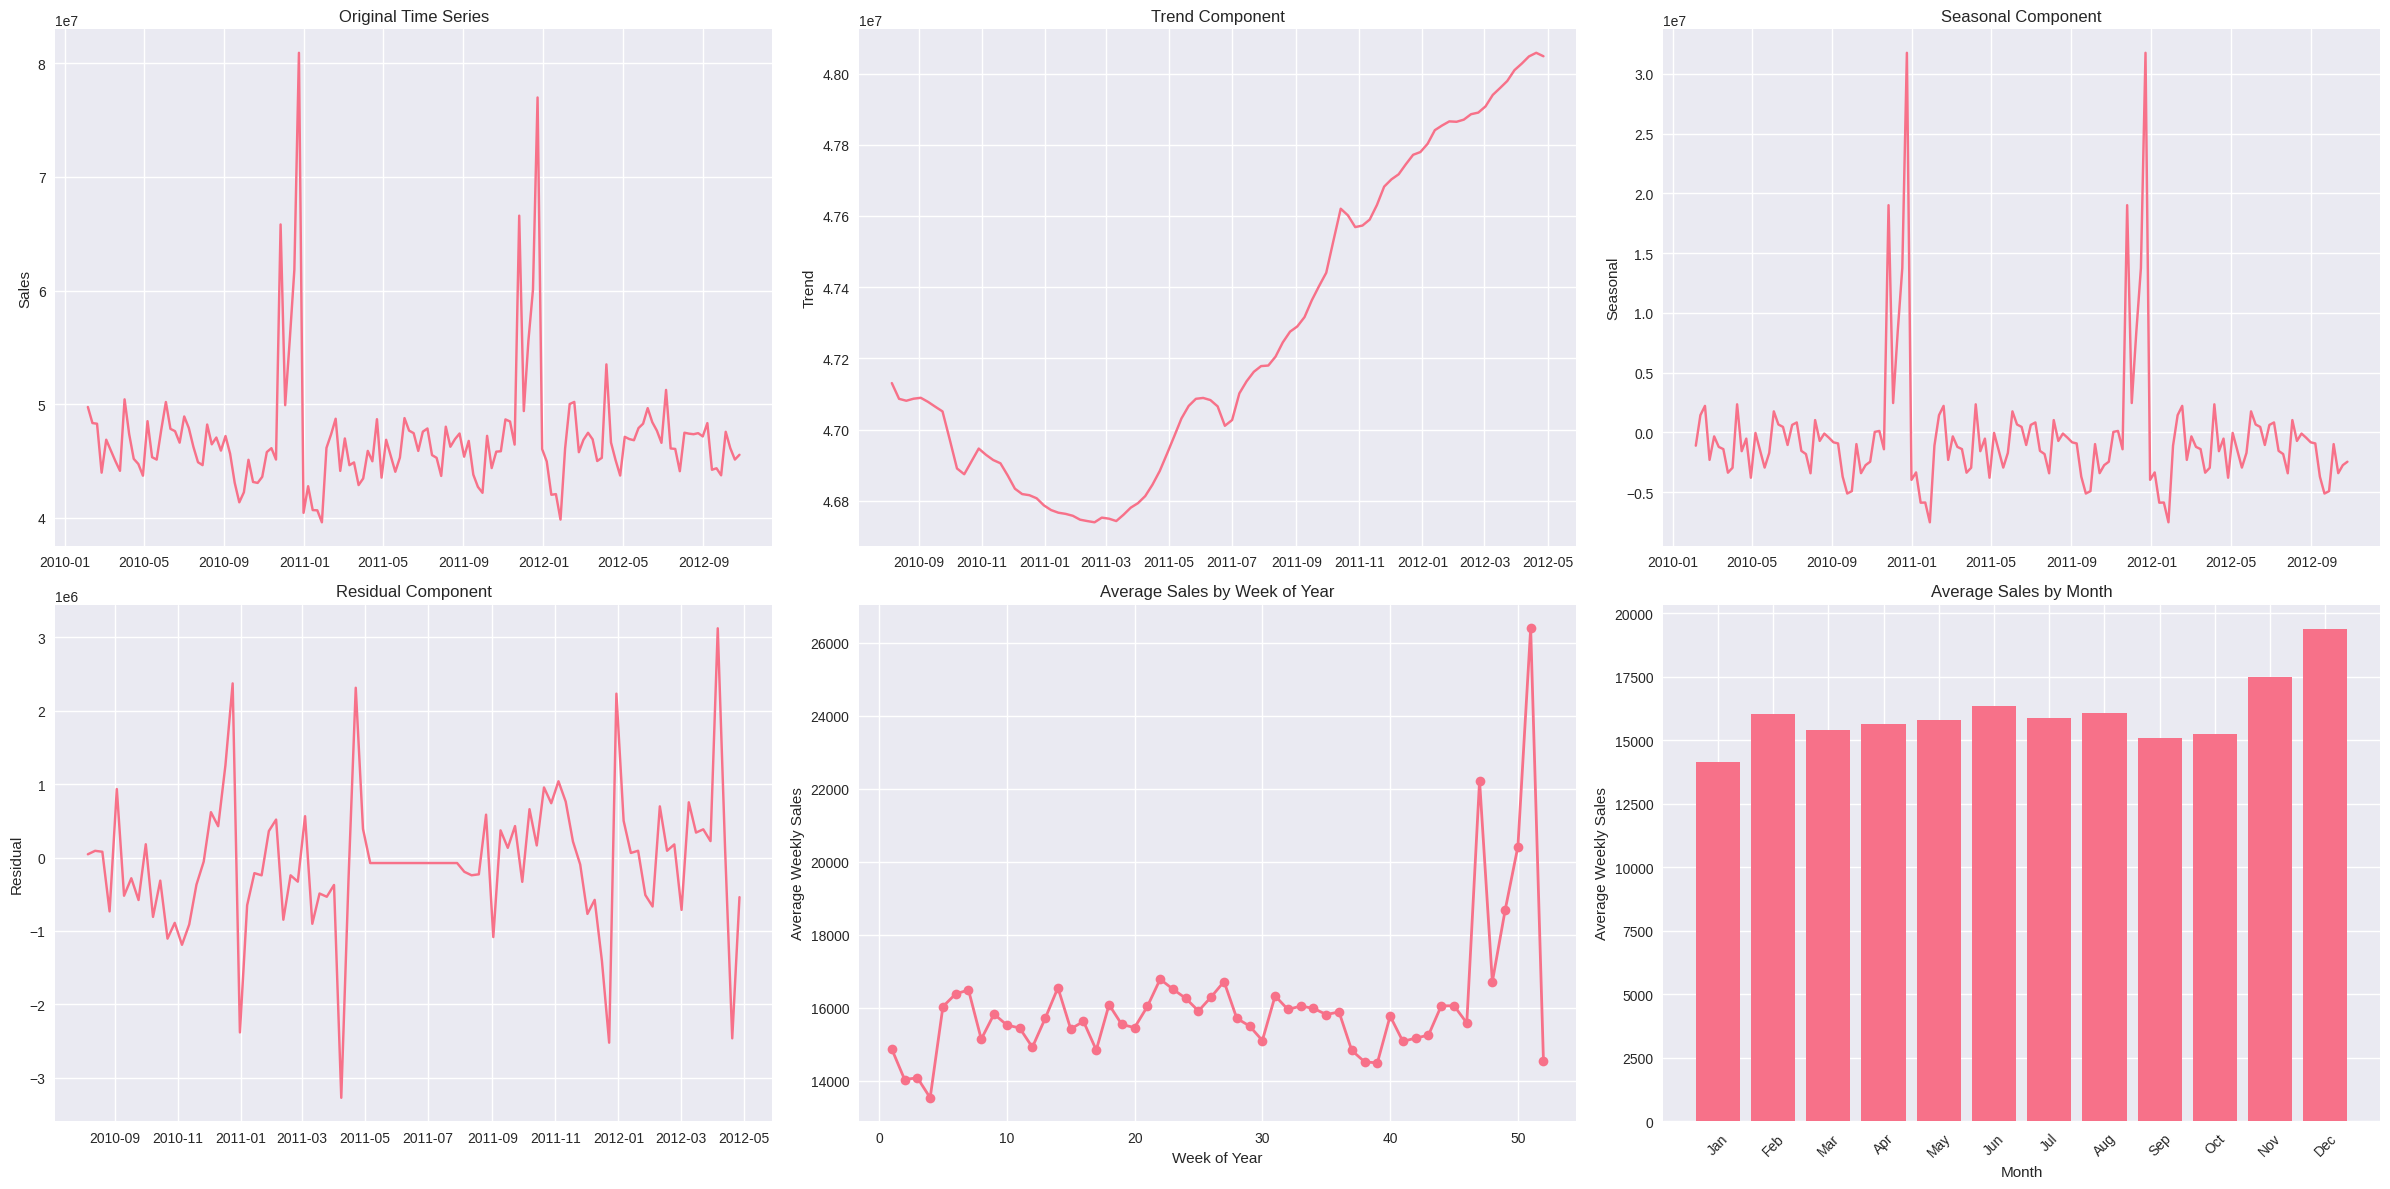

Seasonal component strength (std): 5396236.07
Peak seasonal months: [12, 11, 6]
Low seasonal months: [1, 9, 10]
\nHoliday vs Non-Holiday by Month:
IsHoliday         False         True 
Month                                
1          14126.075111           NaN
2          15885.457253  16377.996441
3          15416.657597           NaN
4          15650.338357           NaN
5          15776.337202           NaN
6          16326.137002           NaN
7          15861.419650           NaN
8          16062.516933           NaN
9          14859.674828  15881.693339
10         15243.855576           NaN
11         15894.478108  22220.944538
12         20555.149864  14543.387158


In [13]:
# SEASONALITY ANALYSIS
print("SEASONALITY ANALYSIS")
print("="*50)

fig, axes = plt.subplots(2, 3, figsize=(24, 12))

# 1. Seasonal Decomposition
sales_ts = daily_sales.set_index('Date')['Weekly_Sales']
decomposition = seasonal_decompose(sales_ts, model='additive', period=52)  # Weekly data, yearly seasonality

axes[0,0].plot(decomposition.observed)
axes[0,0].set_title('Original Time Series')
axes[0,0].set_ylabel('Sales')

axes[0,1].plot(decomposition.trend)
axes[0,1].set_title('Trend Component')
axes[0,1].set_ylabel('Trend')

axes[0,2].plot(decomposition.seasonal)
axes[0,2].set_title('Seasonal Component')
axes[0,2].set_ylabel('Seasonal')

axes[1,0].plot(decomposition.resid)
axes[1,0].set_title('Residual Component')
axes[1,0].set_ylabel('Residual')

# 2. Weekly Seasonality Pattern
weekly_pattern = merged_data.groupby('Week')['Weekly_Sales'].mean()
axes[1,1].plot(weekly_pattern.index, weekly_pattern.values, marker='o', linewidth=2)
axes[1,1].set_title('Average Sales by Week of Year')
axes[1,1].set_xlabel('Week of Year')
axes[1,1].set_ylabel('Average Weekly Sales')

# 3. Monthly Seasonality Pattern
monthly_pattern = merged_data.groupby('Month')['Weekly_Sales'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[1,2].bar(range(1, 13), monthly_pattern.values)
axes[1,2].set_title('Average Sales by Month')
axes[1,2].set_xlabel('Month')
axes[1,2].set_ylabel('Average Weekly Sales')
axes[1,2].set_xticks(range(1, 13))
axes[1,2].set_xticklabels(month_names, rotation=45)

plt.tight_layout()
plt.show()

# Seasonality statistics
print(f"Seasonal component strength (std): {decomposition.seasonal.std():.2f}")
print(f"Peak seasonal months: {monthly_pattern.nlargest(3).index.tolist()}")
print(f"Low seasonal months: {monthly_pattern.nsmallest(3).index.tolist()}")

# Holiday seasonality analysis
holiday_seasonality = merged_data.groupby(['Month', 'IsHoliday'])['Weekly_Sales'].mean().unstack()
print(f"\\nHoliday vs Non-Holiday by Month:")
print(holiday_seasonality)


AUTOCORRELATION ANALYSIS


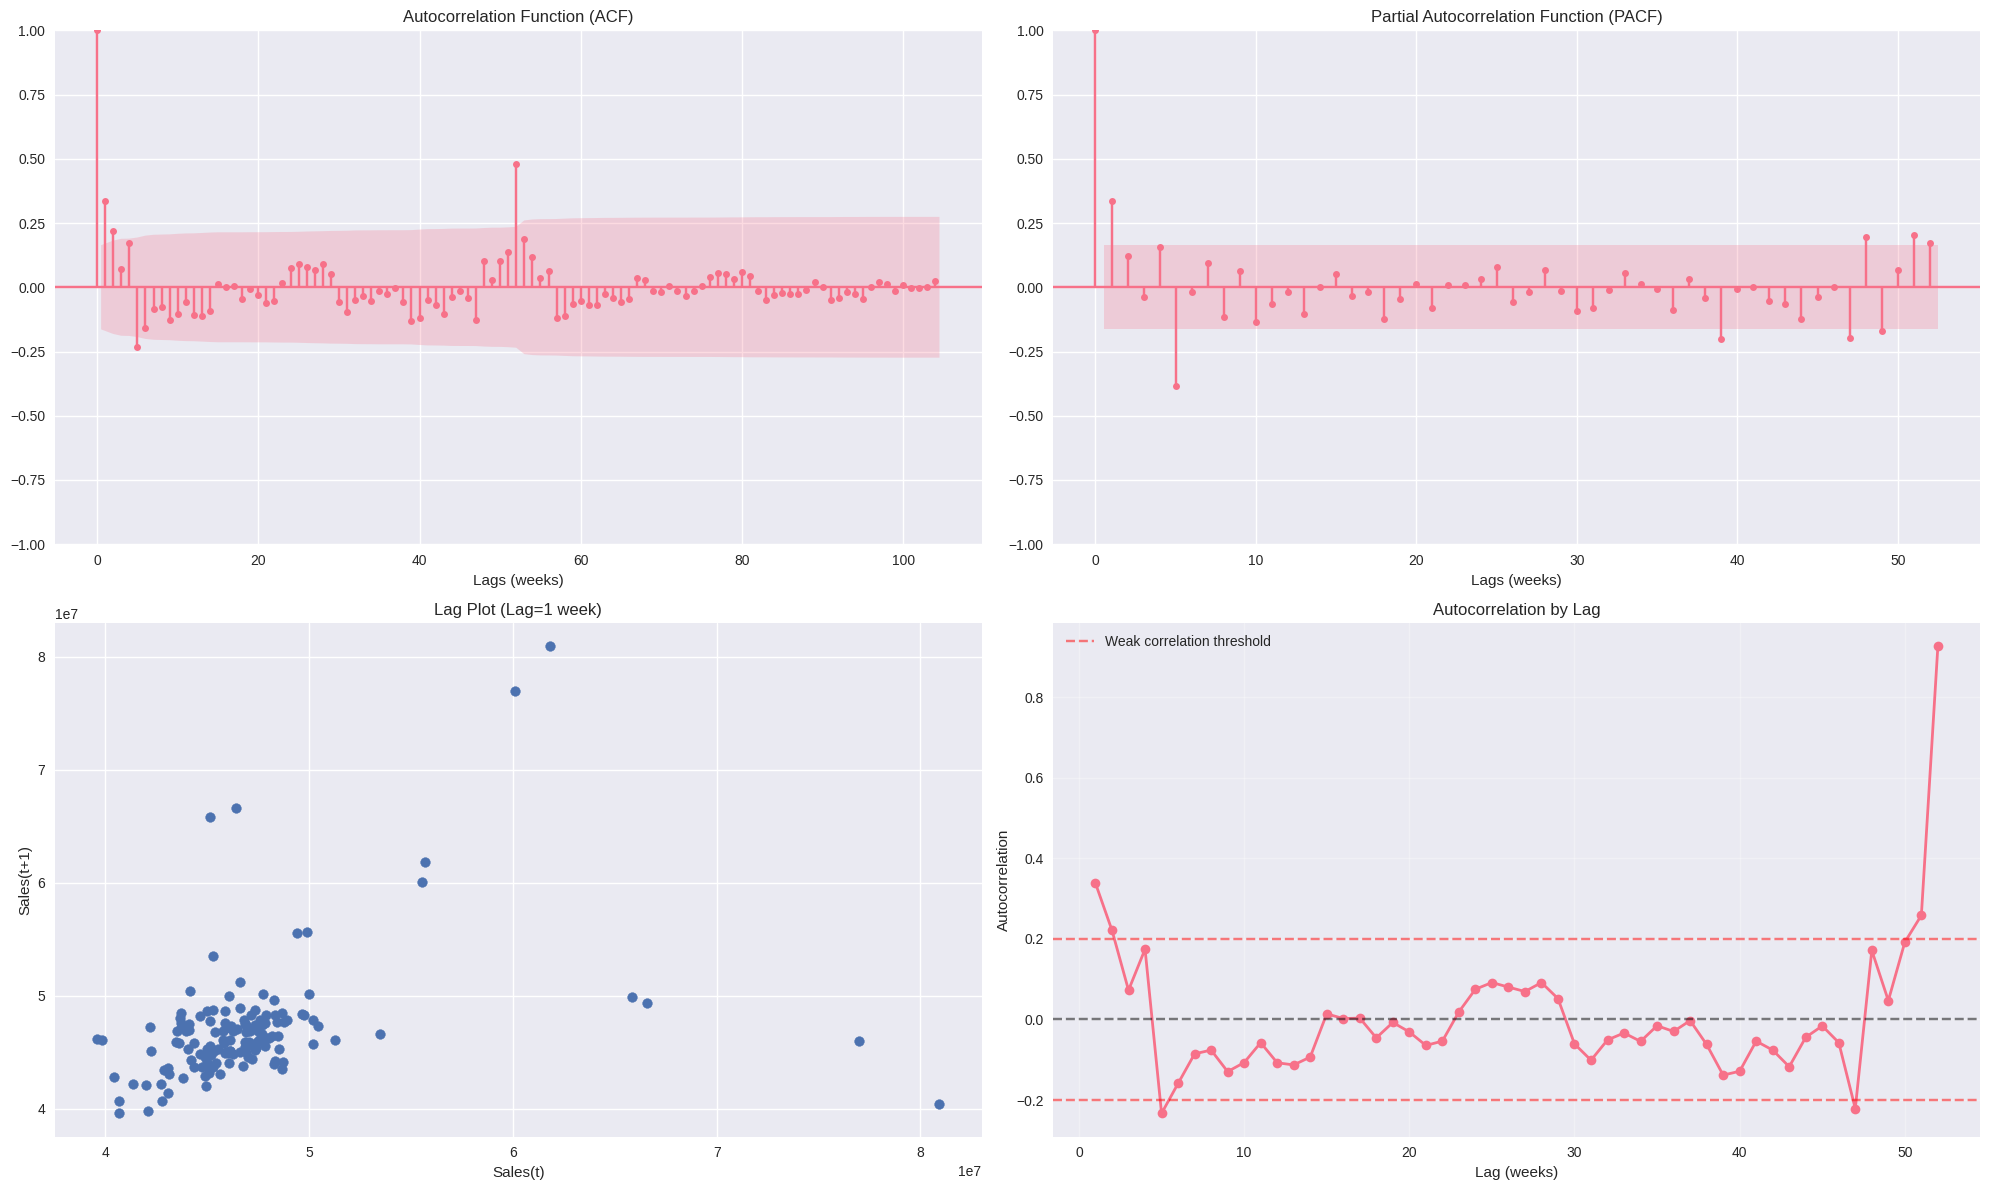

Lag-1 autocorrelation: 0.3378
Lag-52 autocorrelation (yearly): 0.9262
\nSignificant autocorrelations (|r| > 0.2):
  Lag 1: 0.3378
  Lag 2: 0.2210
  Lag 5: -0.2330
  Lag 47: -0.2211
  Lag 51: 0.2584
  Lag 52: 0.9262
\nAugmented Dickey-Fuller Test:
  ADF Statistic: -5.9083
  p-value: 0.0000
  Series is stationary at 5% significance level


In [14]:
# AUTOCORRELATION ANALYSIS
print("AUTOCORRELATION ANALYSIS")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# 1. Autocorrelation Function (ACF)
plot_acf(daily_sales['Weekly_Sales'].dropna(), lags=104, ax=axes[0,0])  # 2 years of lags
axes[0,0].set_title('Autocorrelation Function (ACF)')
axes[0,0].set_xlabel('Lags (weeks)')

# 2. Partial Autocorrelation Function (PACF)
plot_pacf(daily_sales['Weekly_Sales'].dropna(), lags=52, ax=axes[0,1])  # 1 year of lags
axes[0,1].set_title('Partial Autocorrelation Function (PACF)')
axes[0,1].set_xlabel('Lags (weeks)')

# 3. Lag Plot for lag=1 (week-to-week correlation)
from pandas.plotting import lag_plot
lag_plot(daily_sales['Weekly_Sales'], lag=1, ax=axes[1,0])
axes[1,0].set_title('Lag Plot (Lag=1 week)')
axes[1,0].set_xlabel('Sales(t)')
axes[1,0].set_ylabel('Sales(t+1)')

# 4. Multiple lag correlations
lags = range(1, 53)  # 1 to 52 weeks
autocorr_values = [daily_sales['Weekly_Sales'].autocorr(lag=lag) for lag in lags]

axes[1,1].plot(lags, autocorr_values, marker='o', linewidth=2)
axes[1,1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1,1].axhline(y=0.2, color='red', linestyle='--', alpha=0.5, label='Weak correlation threshold')
axes[1,1].axhline(y=-0.2, color='red', linestyle='--', alpha=0.5)
axes[1,1].set_title('Autocorrelation by Lag')
axes[1,1].set_xlabel('Lag (weeks)')
axes[1,1].set_ylabel('Autocorrelation')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Key autocorrelation statistics
print(f"Lag-1 autocorrelation: {daily_sales['Weekly_Sales'].autocorr(lag=1):.4f}")
print(f"Lag-52 autocorrelation (yearly): {daily_sales['Weekly_Sales'].autocorr(lag=52):.4f}")

# Find significant autocorrelations
significant_lags = [(lag, corr) for lag, corr in zip(lags, autocorr_values) if abs(corr) > 0.2]
print(f"\\nSignificant autocorrelations (|r| > 0.2):")
for lag, corr in significant_lags[:10]:  # Top 10
    print(f"  Lag {lag}: {corr:.4f}")

# Stationarity test
adf_result = adfuller(daily_sales['Weekly_Sales'].dropna())
print(f"\\nAugmented Dickey-Fuller Test:")
print(f"  ADF Statistic: {adf_result[0]:.4f}")
print(f"  p-value: {adf_result[1]:.4f}")
print(f"  Series is {'stationary' if adf_result[1] < 0.05 else 'non-stationary'} at 5% significance level")


EXTERNAL FACTORS CORRELATION ANALYSIS


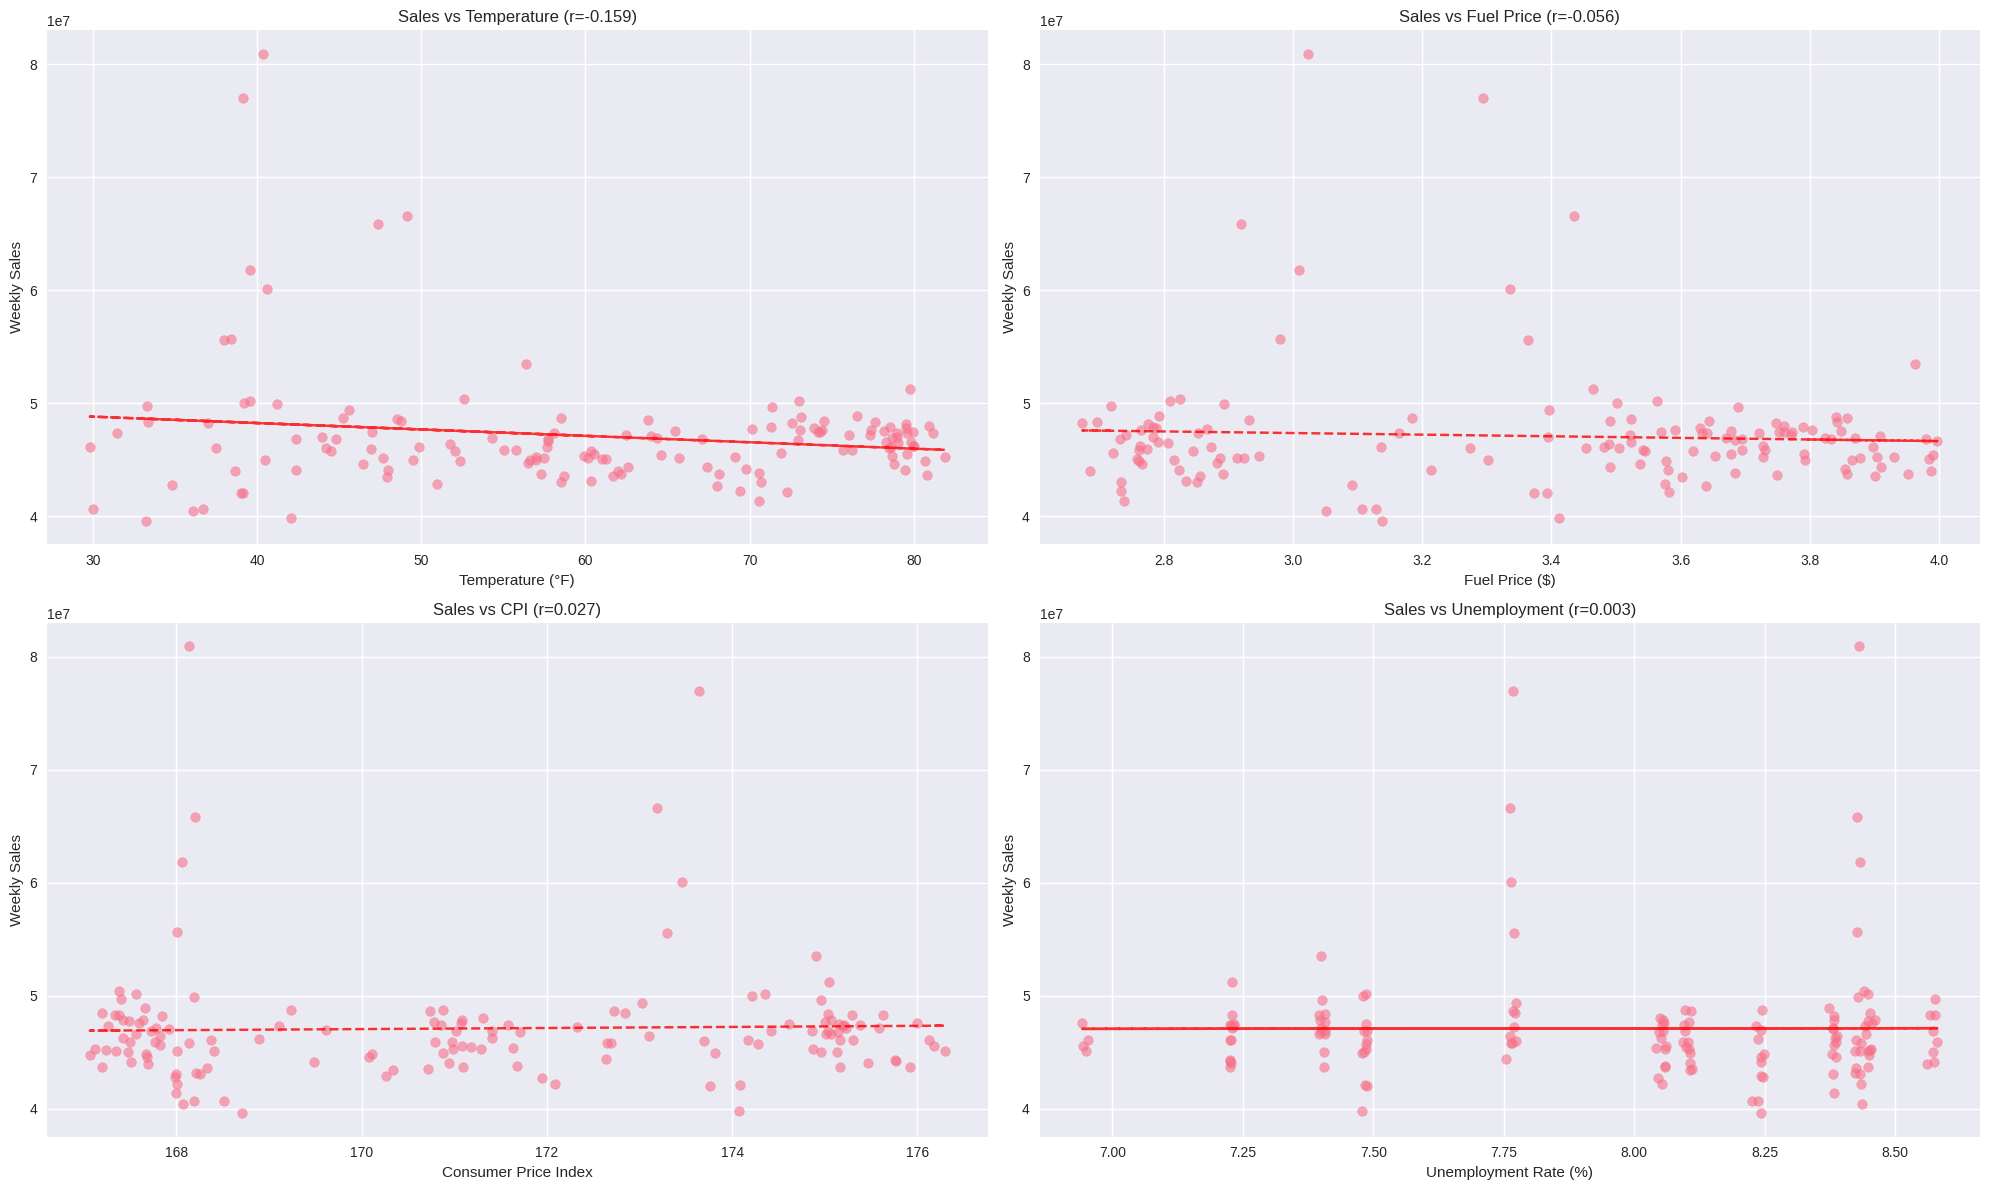

Correlation Matrix with Weekly Sales:
Weekly_Sales    1.000000
CPI             0.027008
Unemployment    0.003443
Fuel_Price     -0.056371
Temperature    -0.158603
Name: Weekly_Sales, dtype: float64


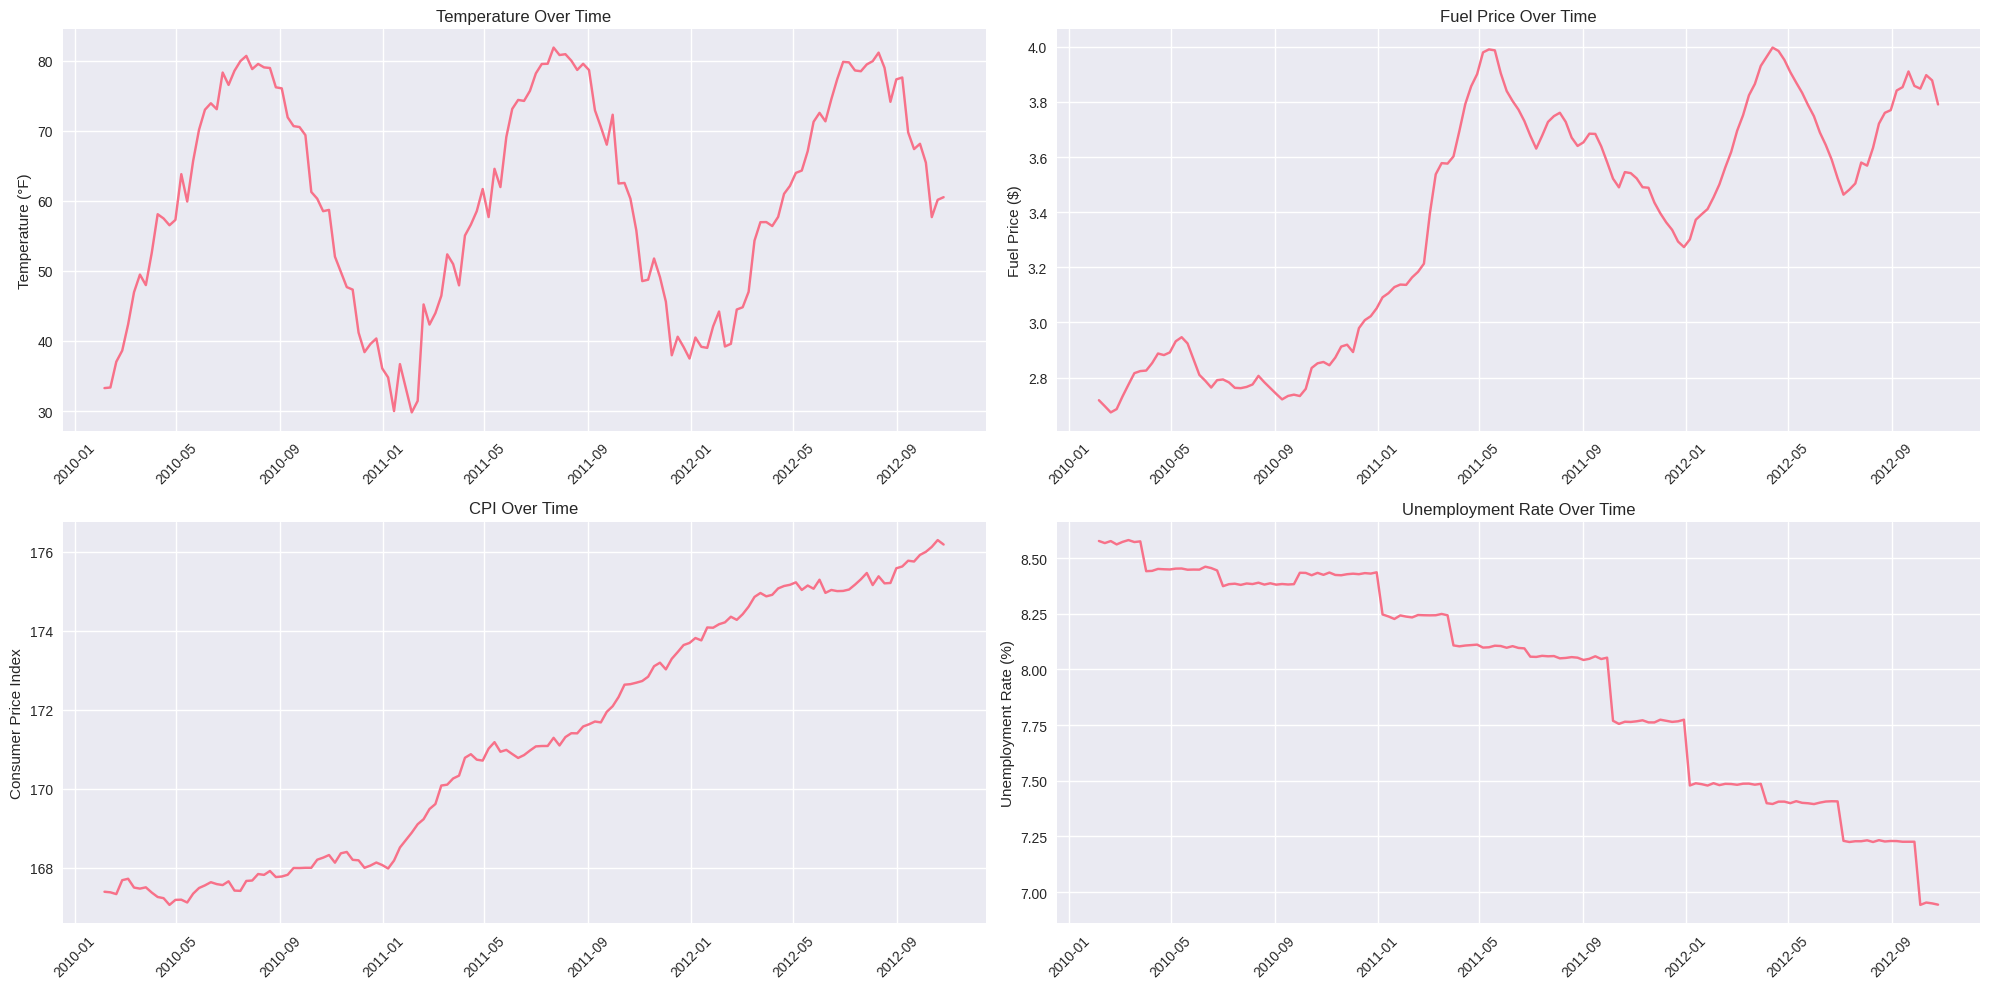

In [15]:
# EXTERNAL FACTORS CORRELATION ANALYSIS
print("EXTERNAL FACTORS CORRELATION ANALYSIS")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# 1. Sales vs Temperature
axes[0,0].scatter(daily_sales['Temperature'], daily_sales['Weekly_Sales'], alpha=0.6)
temp_corr = daily_sales['Temperature'].corr(daily_sales['Weekly_Sales'])
axes[0,0].set_title(f'Sales vs Temperature (r={temp_corr:.3f})')
axes[0,0].set_xlabel('Temperature (°F)')
axes[0,0].set_ylabel('Weekly Sales')

# Add trend line
z = np.polyfit(daily_sales['Temperature'].dropna(), 
               daily_sales['Weekly_Sales'][daily_sales['Temperature'].notna()], 1)
p = np.poly1d(z)
axes[0,0].plot(daily_sales['Temperature'], p(daily_sales['Temperature']), "r--", alpha=0.8)

# 2. Sales vs Fuel Price
axes[0,1].scatter(daily_sales['Fuel_Price'], daily_sales['Weekly_Sales'], alpha=0.6)
fuel_corr = daily_sales['Fuel_Price'].corr(daily_sales['Weekly_Sales'])
axes[0,1].set_title(f'Sales vs Fuel Price (r={fuel_corr:.3f})')
axes[0,1].set_xlabel('Fuel Price ($)')
axes[0,1].set_ylabel('Weekly Sales')

# Add trend line
z = np.polyfit(daily_sales['Fuel_Price'].dropna(), 
               daily_sales['Weekly_Sales'][daily_sales['Fuel_Price'].notna()], 1)
p = np.poly1d(z)
axes[0,1].plot(daily_sales['Fuel_Price'], p(daily_sales['Fuel_Price']), "r--", alpha=0.8)

# 3. Sales vs CPI
axes[1,0].scatter(daily_sales['CPI'], daily_sales['Weekly_Sales'], alpha=0.6)
cpi_corr = daily_sales['CPI'].corr(daily_sales['Weekly_Sales'])
axes[1,0].set_title(f'Sales vs CPI (r={cpi_corr:.3f})')
axes[1,0].set_xlabel('Consumer Price Index')
axes[1,0].set_ylabel('Weekly Sales')

# Add trend line
z = np.polyfit(daily_sales['CPI'].dropna(), 
               daily_sales['Weekly_Sales'][daily_sales['CPI'].notna()], 1)
p = np.poly1d(z)
axes[1,0].plot(daily_sales['CPI'], p(daily_sales['CPI']), "r--", alpha=0.8)

# 4. Sales vs Unemployment
axes[1,1].scatter(daily_sales['Unemployment'], daily_sales['Weekly_Sales'], alpha=0.6)
unemp_corr = daily_sales['Unemployment'].corr(daily_sales['Weekly_Sales'])
axes[1,1].set_title(f'Sales vs Unemployment (r={unemp_corr:.3f})')
axes[1,1].set_xlabel('Unemployment Rate (%)')
axes[1,1].set_ylabel('Weekly Sales')

# Add trend line
z = np.polyfit(daily_sales['Unemployment'].dropna(), 
               daily_sales['Weekly_Sales'][daily_sales['Unemployment'].notna()], 1)
p = np.poly1d(z)
axes[1,1].plot(daily_sales['Unemployment'], p(daily_sales['Unemployment']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# Correlation matrix for external factors
external_factors = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
correlation_matrix = daily_sales[external_factors + ['Weekly_Sales']].corr()

print("Correlation Matrix with Weekly Sales:")
print(correlation_matrix['Weekly_Sales'].sort_values(ascending=False))

# Time series of external factors
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

axes[0,0].plot(daily_sales['Date'], daily_sales['Temperature'])
axes[0,0].set_title('Temperature Over Time')
axes[0,0].set_ylabel('Temperature (°F)')
axes[0,0].tick_params(axis='x', rotation=45)

axes[0,1].plot(daily_sales['Date'], daily_sales['Fuel_Price'])
axes[0,1].set_title('Fuel Price Over Time')
axes[0,1].set_ylabel('Fuel Price ($)')
axes[0,1].tick_params(axis='x', rotation=45)

axes[1,0].plot(daily_sales['Date'], daily_sales['CPI'])
axes[1,0].set_title('CPI Over Time')
axes[1,0].set_ylabel('Consumer Price Index')
axes[1,0].tick_params(axis='x', rotation=45)

axes[1,1].plot(daily_sales['Date'], daily_sales['Unemployment'])
axes[1,1].set_title('Unemployment Rate Over Time')
axes[1,1].set_ylabel('Unemployment Rate (%)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


ADVANCED TIME SERIES INSIGHTS


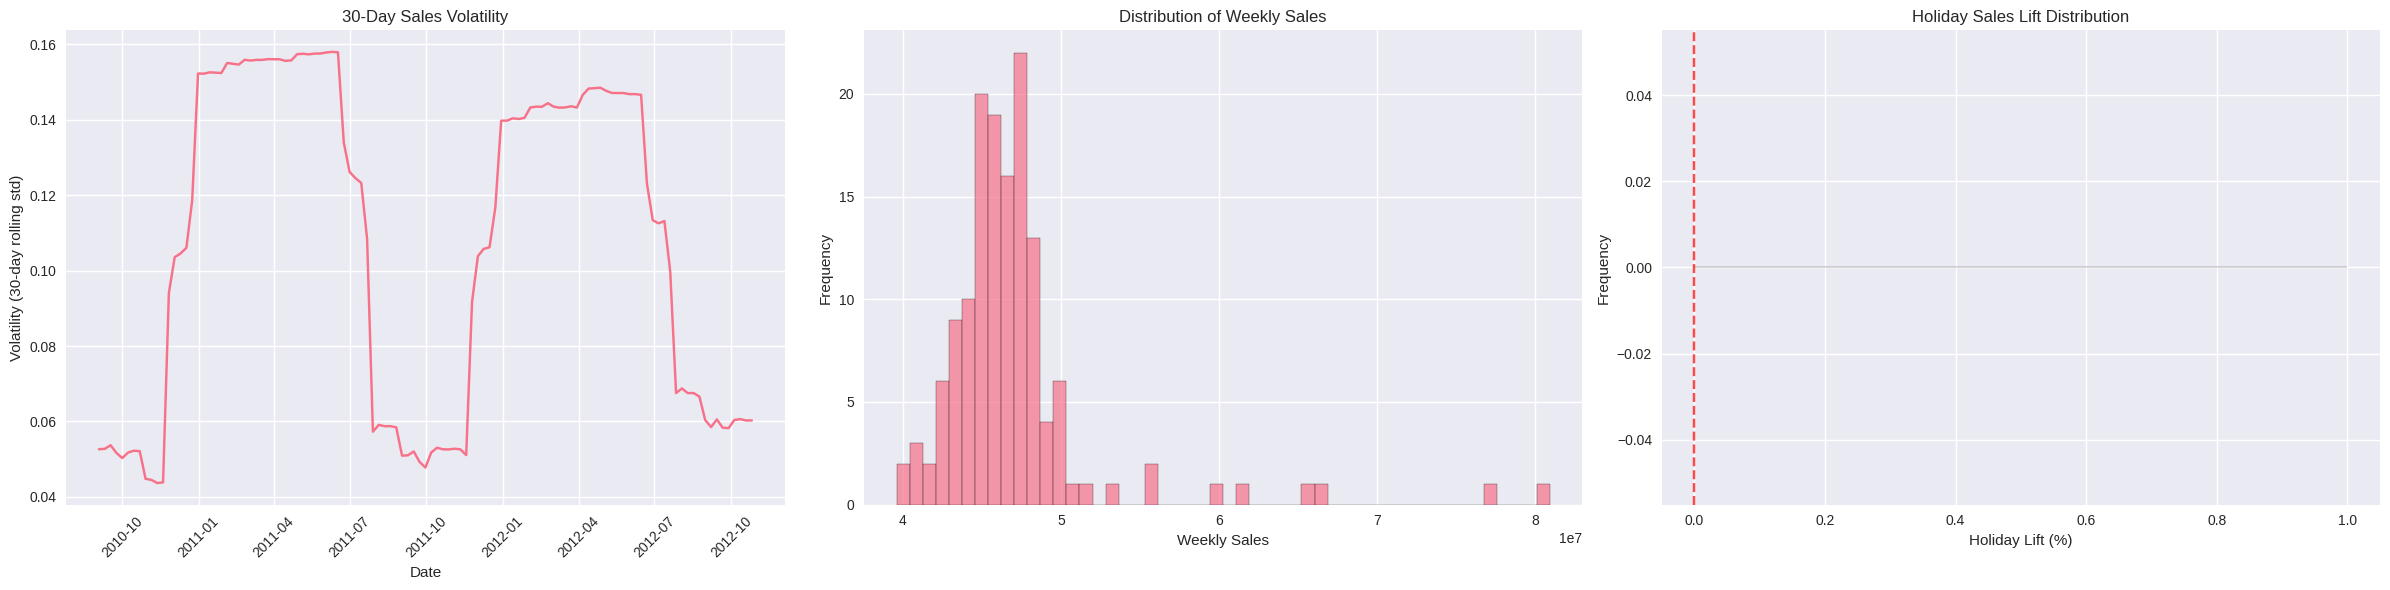

\nKEY FINDINGS SUMMARY:
1. TREND: Overall correlation with time: 0.0325
2. SEASONALITY: Strongest seasonal component std: 5396236.07
3. AUTOCORRELATION: Weekly persistence (lag-1): 0.3378
4. ANNUAL CYCLE: Year-over-year correlation (lag-52): 0.9262
5. STATIONARITY: Series is stationary
6. EXTERNAL FACTORS:
   - Temperature correlation: -0.1586
   - Fuel Price correlation: -0.0564
   - CPI correlation: 0.0270
   - Unemployment correlation: 0.0034
7. VOLATILITY: Mean 30-day volatility: 0.1072
8. HOLIDAY EFFECT: Average holiday lift: nan%
\nRECOMMENDATIONS FOR MODELING:
- Use lag features (especially lag-1 and seasonal lags)
- Include seasonal decomposition components
- Consider external factors as regressors
- Account for holiday effects with special treatment
- Apply differencing if modeling requires stationarity
- Use ensemble methods to capture different patterns


In [16]:
# ADVANCED TIME SERIES INSIGHTS AND SUMMARY
print("ADVANCED TIME SERIES INSIGHTS")
print("="*50)

# 1. Volatility Analysis
daily_sales['Sales_Returns'] = daily_sales['Weekly_Sales'].pct_change()
daily_sales['Volatility_30d'] = daily_sales['Sales_Returns'].rolling(window=30).std()

fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Sales volatility over time
axes[0].plot(daily_sales['Date'], daily_sales['Volatility_30d'])
axes[0].set_title('30-Day Sales Volatility')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Volatility (30-day rolling std)')
axes[0].tick_params(axis='x', rotation=45)

# Distribution of sales
axes[1].hist(daily_sales['Weekly_Sales'], bins=50, alpha=0.7, edgecolor='black')
axes[1].set_title('Distribution of Weekly Sales')
axes[1].set_xlabel('Weekly Sales')
axes[1].set_ylabel('Frequency')

# Holiday effect magnitude
holiday_effect = merged_data.groupby(['Date', 'IsHoliday'])['Weekly_Sales'].sum().unstack()
holiday_effect['Holiday_Lift'] = (holiday_effect[True] - holiday_effect[False]) / holiday_effect[False] * 100
holiday_effect = holiday_effect.dropna()

axes[2].hist(holiday_effect['Holiday_Lift'], bins=20, alpha=0.7, edgecolor='black')
axes[2].axvline(x=0, color='red', linestyle='--', alpha=0.7)
axes[2].set_title('Holiday Sales Lift Distribution')
axes[2].set_xlabel('Holiday Lift (%)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Summary statistics
print("\\nKEY FINDINGS SUMMARY:")
print("="*30)
print(f"1. TREND: Overall correlation with time: {stats.pearsonr(range(len(daily_sales)), daily_sales['Weekly_Sales'])[0]:.4f}")
print(f"2. SEASONALITY: Strongest seasonal component std: {decomposition.seasonal.std():.2f}")
print(f"3. AUTOCORRELATION: Weekly persistence (lag-1): {daily_sales['Weekly_Sales'].autocorr(lag=1):.4f}")
print(f"4. ANNUAL CYCLE: Year-over-year correlation (lag-52): {daily_sales['Weekly_Sales'].autocorr(lag=52):.4f}")
print(f"5. STATIONARITY: Series is {'stationary' if adf_result[1] < 0.05 else 'non-stationary'}")
print(f"6. EXTERNAL FACTORS:")
print(f"   - Temperature correlation: {temp_corr:.4f}")
print(f"   - Fuel Price correlation: {fuel_corr:.4f}")
print(f"   - CPI correlation: {cpi_corr:.4f}")
print(f"   - Unemployment correlation: {unemp_corr:.4f}")
print(f"7. VOLATILITY: Mean 30-day volatility: {daily_sales['Volatility_30d'].mean():.4f}")
print(f"8. HOLIDAY EFFECT: Average holiday lift: {holiday_effect['Holiday_Lift'].mean():.2f}%")

print("\\nRECOMMENDATIONS FOR MODELING:")
print("="*35)
print("- Use lag features (especially lag-1 and seasonal lags)")
print("- Include seasonal decomposition components")
print("- Consider external factors as regressors")
print("- Account for holiday effects with special treatment")
print("- Apply differencing if modeling requires stationarity")
print("- Use ensemble methods to capture different patterns")


FREQUENCY DOMAIN ANALYSIS


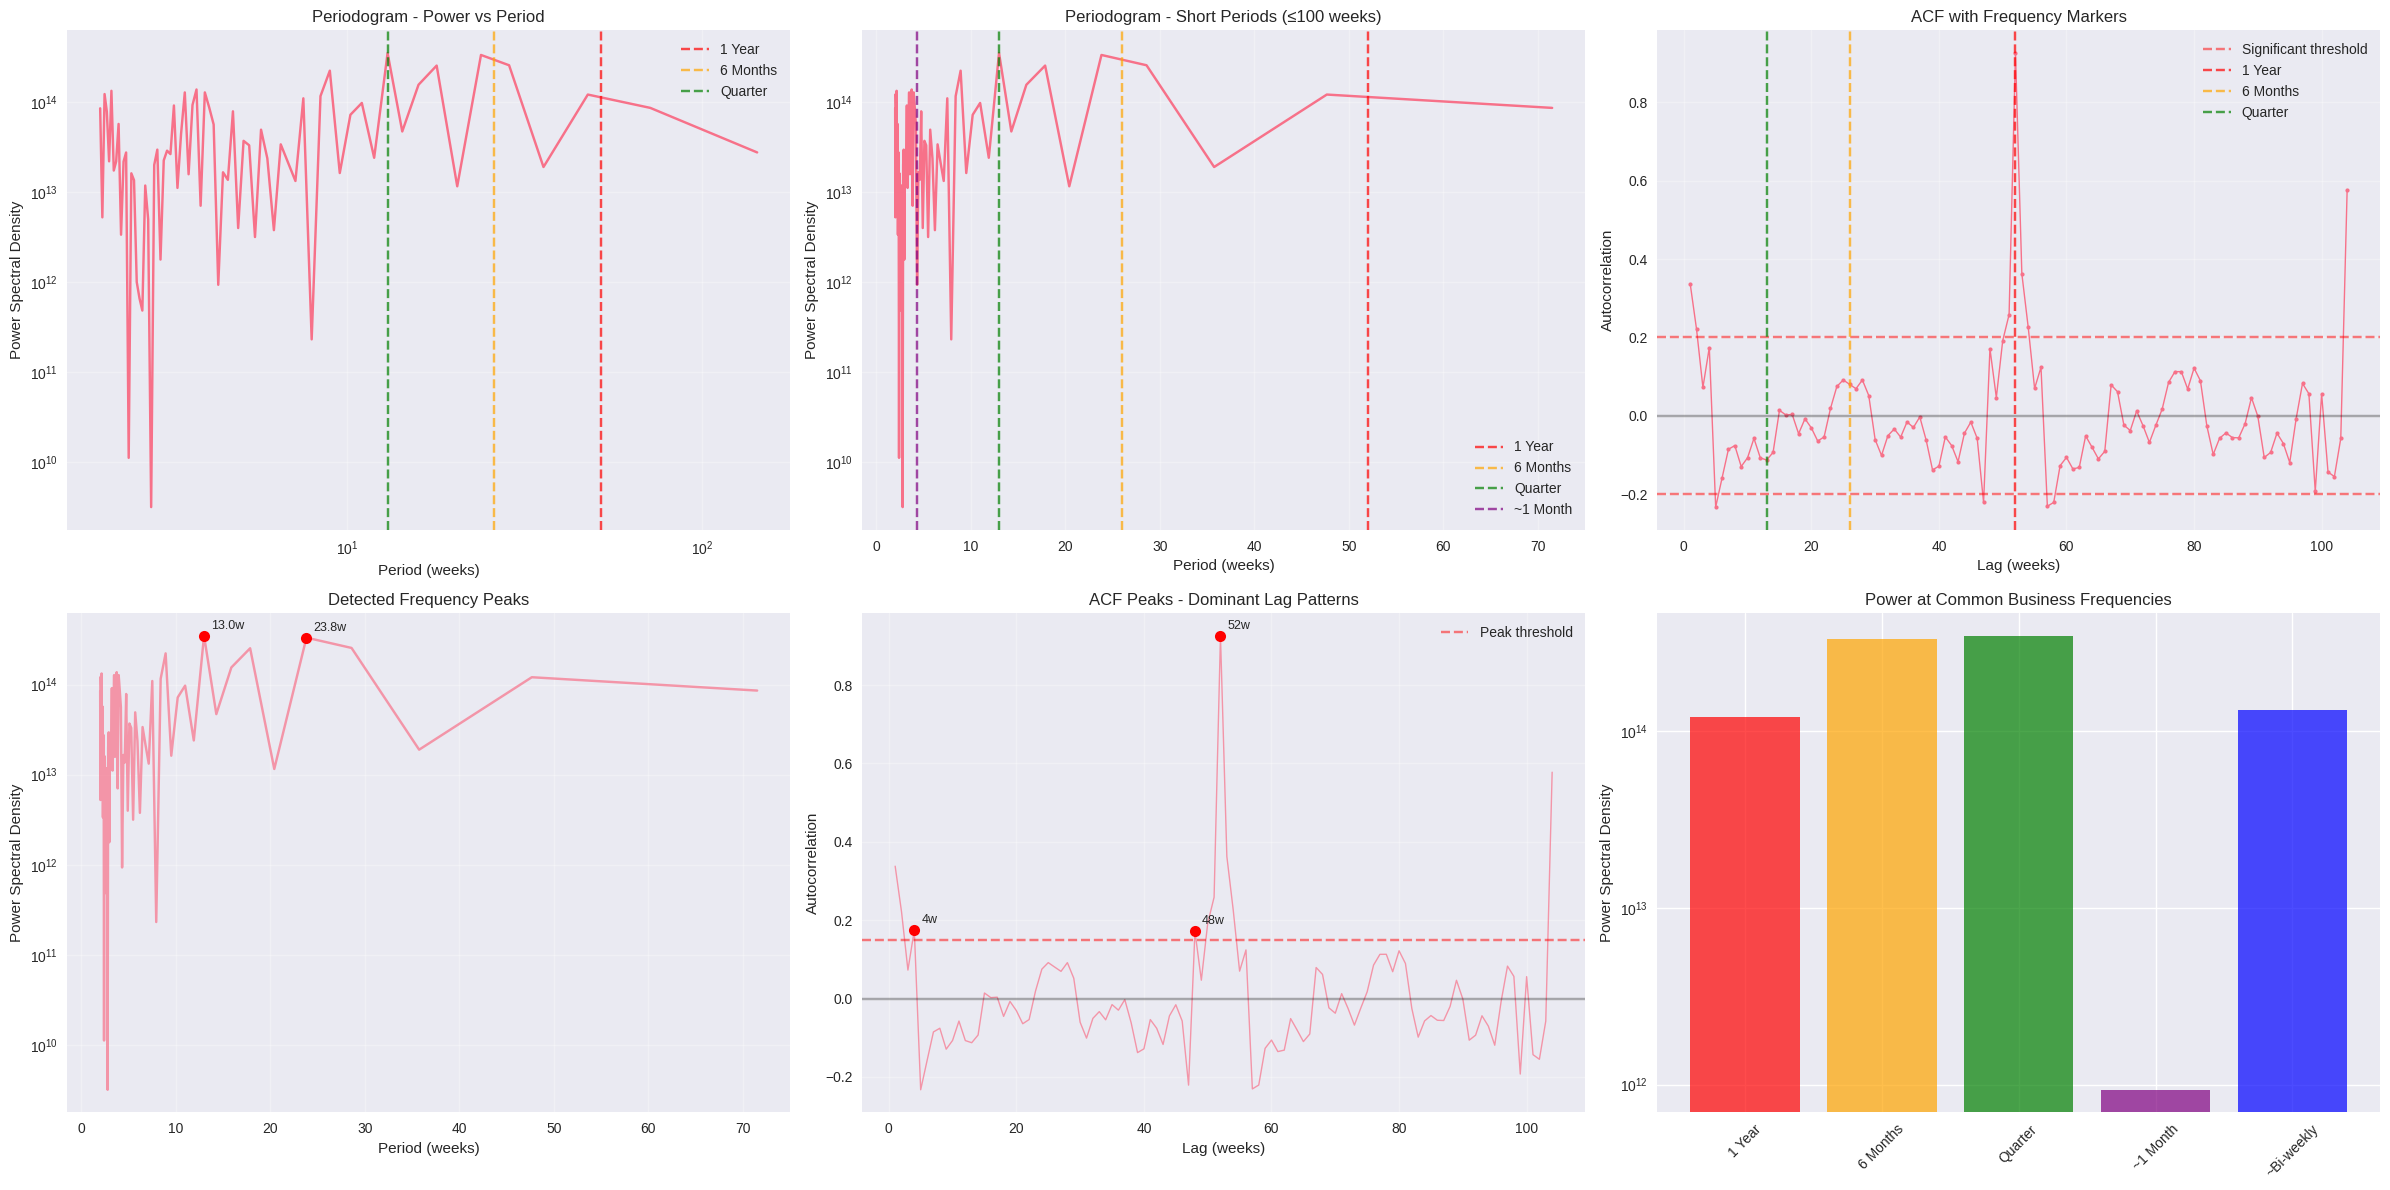


MOST PROMINENT FREQUENCIES:
Top frequencies by power (from periodogram):
   1. Period:   13.0 weeks (0.25 years) - Power: 3.48e+14
   2. Period:   23.8 weeks (0.46 years) - Power: 3.31e+14
   3. Period:   28.6 weeks (0.55 years) - Power: 2.55e+14
   4. Period:   17.9 weeks (0.34 years) - Power: 2.53e+14
   5. Period:    8.9 weeks (0.17 years) - Power: 2.22e+14
   6. Period:   15.9 weeks (0.31 years) - Power: 1.55e+14
   7. Period:    3.8 weeks (0.07 years) - Power: 1.37e+14
   8. Period:    2.2 weeks (0.04 years) - Power: 1.33e+14
   9. Period:    4.0 weeks (0.08 years) - Power: 1.27e+14
  10. Period:    3.5 weeks (0.07 years) - Power: 1.27e+14

Top ACF peaks (strongest temporal correlations):
  Lag  4 weeks (0.08 years): r = 0.174
  Lag 48 weeks (0.92 years): r = 0.171
  Lag 52 weeks (1.00 years): r = 0.926

Frequency Analysis Summary:
- Annual cycle (52 weeks): Present
- Semi-annual (26 weeks): Weak/Absent
- Quarterly (13 weeks): STRONG
- Monthly (~4.3 weeks): Weak/Absent


In [17]:
# FREQUENCY DOMAIN ANALYSIS - FINDING MOST PROMINENT FREQUENCIES
print("FREQUENCY DOMAIN ANALYSIS")
print("="*50)

import numpy as np
from scipy import signal
from scipy.fft import fft, fftfreq

# Ensure we have clean data for frequency analysis
sales_clean = daily_sales['Weekly_Sales'].dropna()

fig, axes = plt.subplots(2, 3, figsize=(24, 12))

# 1. Periodogram - shows power at different frequencies
frequencies, power = signal.periodogram(sales_clean, fs=1.0)  # fs=1 means one sample per week
# Convert to periods (more intuitive than frequencies)
periods = 1 / frequencies[1:]  # Skip the zero frequency
power_nonzero = power[1:]

# Plot periodogram
axes[0,0].loglog(periods, power_nonzero)
axes[0,0].set_xlabel('Period (weeks)')
axes[0,0].set_ylabel('Power Spectral Density')
axes[0,0].set_title('Periodogram - Power vs Period')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].axvline(x=52, color='red', linestyle='--', alpha=0.7, label='1 Year')
axes[0,0].axvline(x=26, color='orange', linestyle='--', alpha=0.7, label='6 Months')
axes[0,0].axvline(x=13, color='green', linestyle='--', alpha=0.7, label='Quarter')
axes[0,0].legend()

# 2. Zoomed periodogram for shorter periods
short_periods_mask = periods <= 100
axes[0,1].semilogy(periods[short_periods_mask], power_nonzero[short_periods_mask])
axes[0,1].set_xlabel('Period (weeks)')
axes[0,1].set_ylabel('Power Spectral Density')
axes[0,1].set_title('Periodogram - Short Periods (≤100 weeks)')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].axvline(x=52, color='red', linestyle='--', alpha=0.7, label='1 Year')
axes[0,1].axvline(x=26, color='orange', linestyle='--', alpha=0.7, label='6 Months')
axes[0,1].axvline(x=13, color='green', linestyle='--', alpha=0.7, label='Quarter')
axes[0,1].axvline(x=4.33, color='purple', linestyle='--', alpha=0.7, label='~1 Month')
axes[0,1].legend()

# 3. ACF interpretation for frequencies
lags = np.arange(1, 105)  # 2 years of lags
acf_values = [sales_clean.autocorr(lag=lag) for lag in lags]

axes[0,2].plot(lags, acf_values, marker='o', markersize=3, linewidth=1)
axes[0,2].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[0,2].axhline(y=0.2, color='red', linestyle='--', alpha=0.5, label='Significant threshold')
axes[0,2].axhline(y=-0.2, color='red', linestyle='--', alpha=0.5)
axes[0,2].axvline(x=52, color='red', linestyle='--', alpha=0.7, label='1 Year')
axes[0,2].axvline(x=26, color='orange', linestyle='--', alpha=0.7, label='6 Months')
axes[0,2].axvline(x=13, color='green', linestyle='--', alpha=0.7, label='Quarter')
axes[0,2].set_xlabel('Lag (weeks)')
axes[0,2].set_ylabel('Autocorrelation')
axes[0,2].set_title('ACF with Frequency Markers')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# 4. Find and highlight peaks in periodogram
from scipy.signal import find_peaks

# Find peaks in power spectrum
peak_indices, properties = find_peaks(power_nonzero, height=np.percentile(power_nonzero, 95), distance=5)
peak_periods = periods[peak_indices]
peak_powers = power_nonzero[peak_indices]

axes[1,0].semilogy(periods[short_periods_mask], power_nonzero[short_periods_mask], alpha=0.7)
for period, power_val in zip(peak_periods, peak_powers):
    if period <= 100:  # Only show peaks in short period range
        axes[1,0].semilogy(period, power_val, 'ro', markersize=8)
        axes[1,0].annotate(f'{period:.1f}w', (period, power_val), 
                          xytext=(5, 5), textcoords='offset points', fontsize=9)

axes[1,0].set_xlabel('Period (weeks)')
axes[1,0].set_ylabel('Power Spectral Density')
axes[1,0].set_title('Detected Frequency Peaks')
axes[1,0].grid(True, alpha=0.3)

# 5. ACF peaks detection
acf_array = np.array(acf_values)
acf_peaks, _ = find_peaks(acf_array, height=0.15, distance=3)
acf_peak_lags = lags[acf_peaks]
acf_peak_values = acf_array[acf_peaks]

axes[1,1].plot(lags, acf_values, linewidth=1, alpha=0.7)
axes[1,1].plot(acf_peak_lags, acf_peak_values, 'ro', markersize=8)
for lag, val in zip(acf_peak_lags, acf_peak_values):
    axes[1,1].annotate(f'{lag}w', (lag, val), 
                      xytext=(5, 5), textcoords='offset points', fontsize=9)
axes[1,1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1,1].axhline(y=0.15, color='red', linestyle='--', alpha=0.5, label='Peak threshold')
axes[1,1].set_xlabel('Lag (weeks)')
axes[1,1].set_ylabel('Autocorrelation')
axes[1,1].set_title('ACF Peaks - Dominant Lag Patterns')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# 6. Frequency strength comparison
common_periods = [52, 26, 13, 4.33, 2.17]  # 1 year, 6 months, quarter, month, bi-weekly
period_names = ['1 Year', '6 Months', 'Quarter', '~1 Month', '~Bi-weekly']

# Get power for these specific periods (find closest matches)
period_powers = []
for target_period in common_periods:
    closest_idx = np.argmin(np.abs(periods - target_period))
    period_powers.append(power_nonzero[closest_idx])

axes[1,2].bar(period_names, period_powers, alpha=0.7, color=['red', 'orange', 'green', 'purple', 'blue'])
axes[1,2].set_ylabel('Power Spectral Density')
axes[1,2].set_title('Power at Common Business Frequencies')
axes[1,2].tick_params(axis='x', rotation=45)
axes[1,2].set_yscale('log')

plt.tight_layout()
plt.show()

# Summary of findings
print("\nMOST PROMINENT FREQUENCIES:")
print("="*35)

# Top frequencies from periodogram
top_n = 10
top_indices = np.argsort(power_nonzero)[-top_n:][::-1]
top_periods = periods[top_indices]
top_powers = power_nonzero[top_indices]

print("Top frequencies by power (from periodogram):")
for i, (period, power_val) in enumerate(zip(top_periods, top_powers), 1):
    print(f"  {i:2d}. Period: {period:6.1f} weeks ({period/52:.2f} years) - Power: {power_val:.2e}")

print(f"\nTop ACF peaks (strongest temporal correlations):")
for lag, val in zip(acf_peak_lags[:10], acf_peak_values[:10]):
    print(f"  Lag {lag:2d} weeks ({lag/52:.2f} years): r = {val:.3f}")

print(f"\nFrequency Analysis Summary:")
print(f"- Annual cycle (52 weeks): {'STRONG' if 52 in peak_periods or any(abs(p-52) < 2 for p in peak_periods) else 'Present'}")
print(f"- Semi-annual (26 weeks): {'STRONG' if 26 in peak_periods or any(abs(p-26) < 2 for p in peak_periods) else 'Weak/Absent'}")
print(f"- Quarterly (13 weeks): {'STRONG' if 13 in peak_periods or any(abs(p-13) < 1 for p in peak_periods) else 'Weak/Absent'}")
print(f"- Monthly (~4.3 weeks): {'STRONG' if any(abs(p-4.33) < 0.5 for p in peak_periods) else 'Weak/Absent'}")
